<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#PM2.5" data-toc-modified-id="PM2.5-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>PM2.5</a></span></li><li><span><a href="#Covid-19" data-toc-modified-id="Covid-19-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Covid-19</a></span></li><li><span><a href="#Population" data-toc-modified-id="Population-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Population</a></span></li></ul></li><li><span><a href="#Risk" data-toc-modified-id="Risk-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Risk</a></span></li></ul></div>

# Imports

In [117]:
import numpy as np
import xarray as xr
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import pandas as pd
import regionmask
import matplotlib.gridspec as gridspec

from PIL import Image


wtime = widgets.IntSlider(value=0,min=0,max=11,step=1,description='Time step:',continuous_update=True)

eu_countries = regionmask.defined_regions.natural_earth.countries_50


<IPython.core.display.Javascript object>


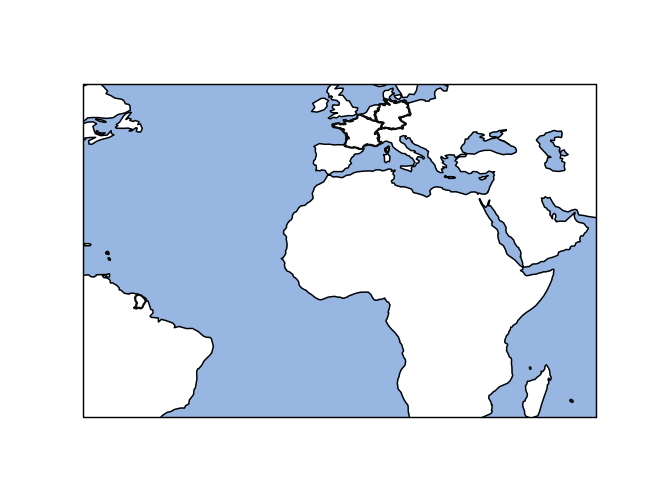

In [19]:
%matplotlib notebook
eu_countries['F','D'].plot(add_label=False)


# Data

## PM2.5

<IPython.core.display.Javascript object>


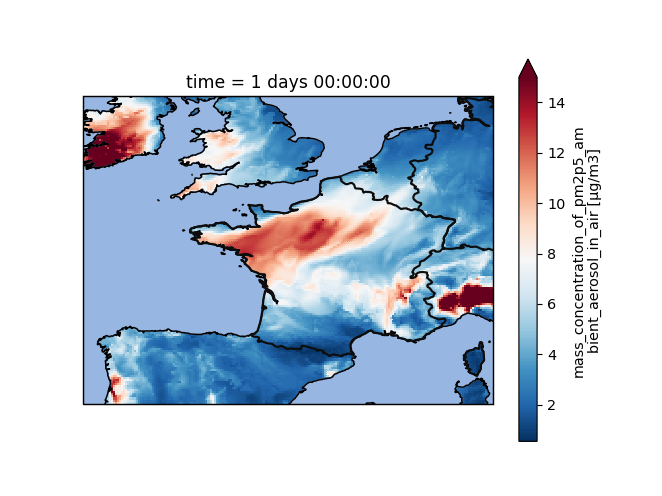

In [63]:
import xarray as xr
pm25 = xr.open_dataset('./../data/pm/pm.nc')
pm25 = pm25.pm2p5_conc.drop('level').squeeze() #.sortby(['longitude'])
pm25.coords['longitude'] = (pm25.coords['longitude'] + 180) % 360 - 180
pm25 = pm25.sortby('longitude')
pm25 = pm25.sel(longitude=slice(-10,10),latitude=slice(55,40))
pm25.shape
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines('10m')
eu_countries['F','D'].plot(ax=ax,add_label=False,resolution='10m')
pm25[4].plot(ax=ax, vmax=15, cmap='RdBu_r')
ax.set_extent([-10,10,40,55])

## Covid-19

As of 10 September 2020, the columns are: iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, total_tests, new_tests, new_tests_smoothed, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed_per_thousand, tests_per_case, positive_rate, tests_units, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index

<IPython.core.display.Javascript object>


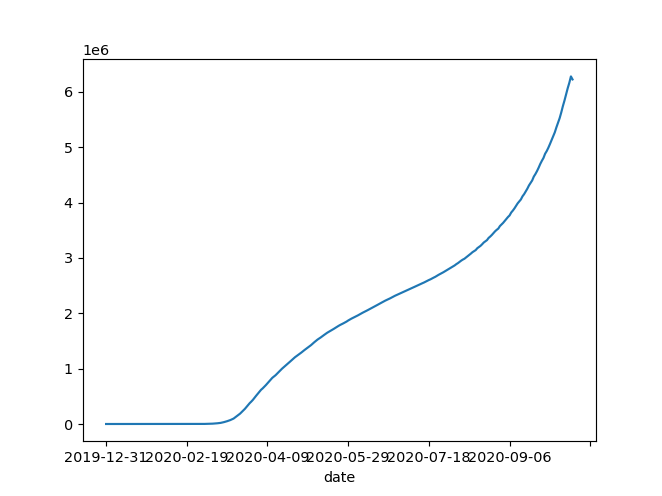

,location,country_code,latitude,longitude,confirmed,dead,recovered,updated
0,Bayanur.,cn,40.743213,107.387657,8,1,7,2020-10-16 23:35:18.899937+00:00
1,Pilõezinhos,br,-6.843131,-35.530578,87,0,None,2020-06-13 00:20:20.628942+00:00
2,Pavussu,br,-7.964325,-43.224345,2,1,None,2020-06-13 00:20:19.650852+00:00
3,"Madison County, Indiana",us,40.146935,-85.684578,2128,95,None,2020-10-16 23:30:39.854313+00:00
4,Foz do Jordão,br,-25.693495,-52.085126,19,0,None,2020-06-13 00:19:58.969475+00:00
...,...,...,...,...,...,...,...,...
9928,Wansheng Economic Opening Zone,cn,27.517320,110.712695,1,0,1,2020-10-16 23:35:18.899937+00:00
9929,"Woodruff County, Arkansas",us,35.121585,-91.135302,79,0,None,2020-10-16 23:30:39.854313+00:00
9930,"Jessamine County, Kentucky",us,37.895573,-84.564147,793,1,None,2020-10-15 23:30:41.781479+00:00
9931,"Richmond County, North Carolina",us,35.003045,-79.784842,1232,23,None,2020-10-16 23:30:39.854313+00:00


In [4]:
%matplotlib notebook
covid = pd.read_csv('./../data/covid/owid-covid-data.csv')
covid = covid[covid['continent']=='Europe']
covid.head()
covid.groupby('date').sum().total_cases[:-1].plot()
plt.show()

cities = pd.read_csv('./../data/covid/cities.csv')
cities

## Population

Index(['reg', 'dep', 'com', 'article', 'com_nom', 'lon', 'lat', 'total'], dtype='object')


<IPython.core.display.Javascript object>


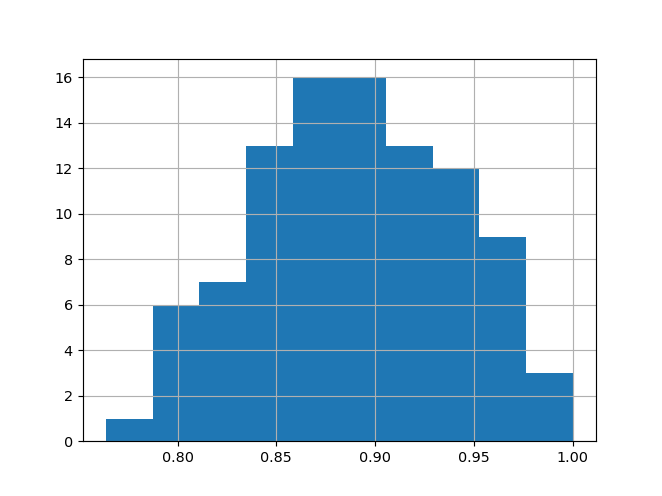

In [5]:
import pandas as pd
popfr = pd.read_csv('./../data/pop/pop_fr.csv', usecols=[0,1,2,3,4,5,6,42])
popfr.columns = ['reg', 'dep', 'com', 'article', 'com_nom', 'lon', 'lat', 'total']
print(popfr.columns)

dep = popfr.copy().groupby('dep').mean()
dep['total'] = popfr.groupby('dep').sum()['total']
dep['logtotal'] = np.log10(dep['total'])
dep['totalNorm'] = (dep['total']) / dep['total'].max()
dep['logtotalNorm'] = (dep['logtotal']) / dep['logtotal'].max()
plt.figure()
dep.logtotalNorm.hist()

<IPython.core.display.Javascript object>


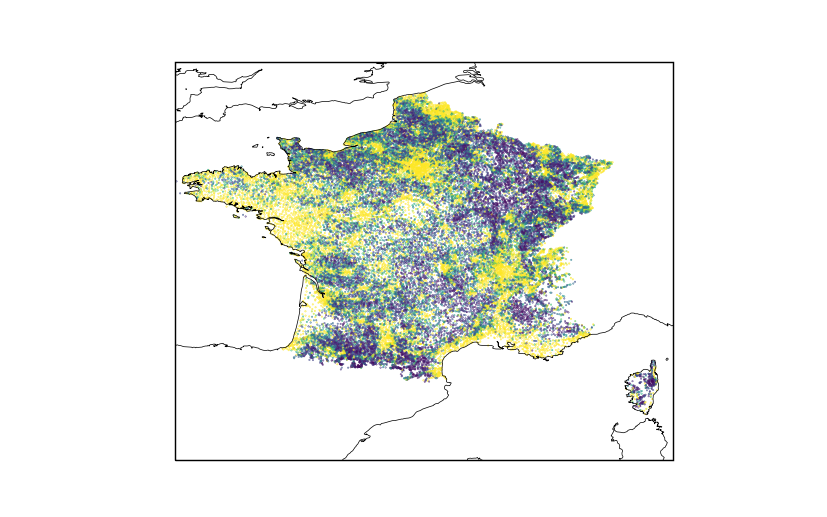

/home/nrieger/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  import sys


In [10]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.coastlines('10m', lw=.5)
ax.set_extent([-5,10,40,52])
ax.scatter(popfr.lon,popfr.lat,c=popfr.total,s=.1, vmin=0, vmax=1000)
#ax.scatter(dep.lon,dep.lat,c=dep.total,s=50, vmin=0, vmax=1000000, cmap='RdBu_r')
plt.tight_layout()

In [137]:
x,y = popfr.lon[::10], popfr.lat[::10]

pmScatter = np.array([pm25[0].interp(longitude=lon,latitude=lat).values for lon,lat in zip(x,y)])
pmScatter = np.vstack((x,y,pmScatter)).T
pmScatter = pd.DataFrame(pmScatter, columns=['lon','lat','pm25'])

<IPython.core.display.Javascript object>


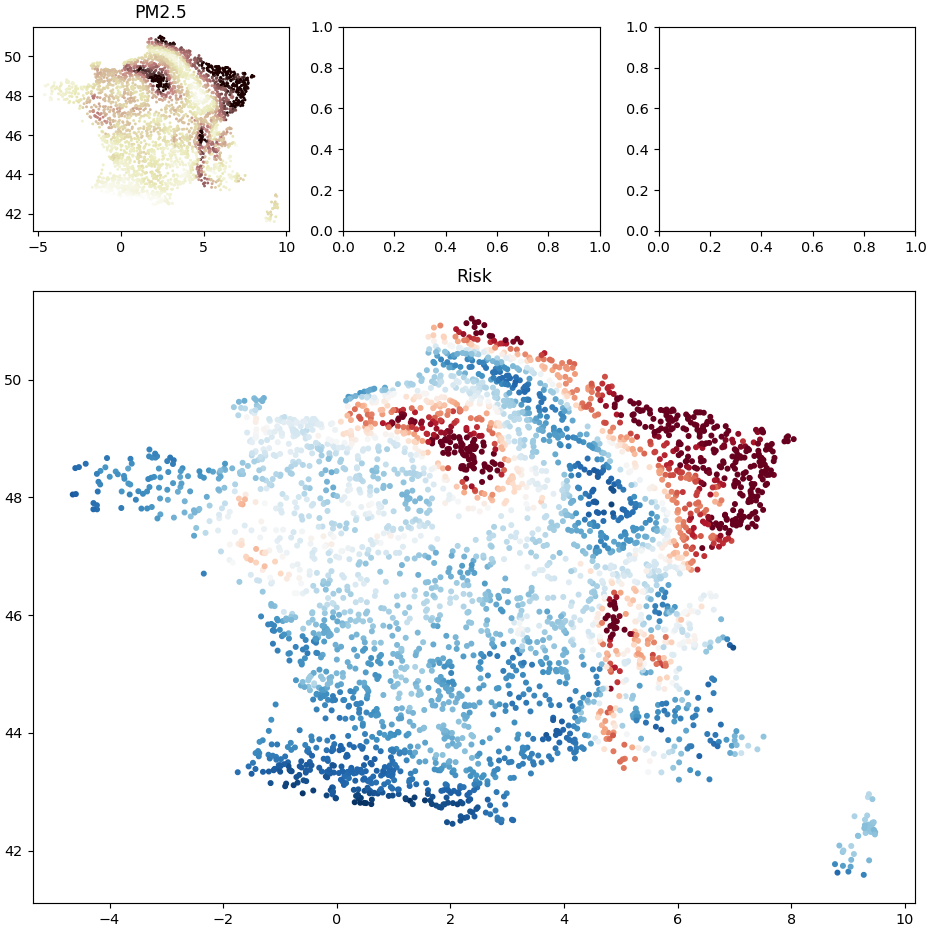

Text(0.5, 1.0, 'Risk')

In [141]:
risk =  pmScatter.pm25
risk = np.vstack((x,y,risk)).T
risk = pd.DataFrame(risk,columns=['lon','lat','risk'])


fig = plt.figure(constrained_layout=True, figsize=(9,9))
gs = fig.add_gridspec(4, 3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1:, :])

ax1.scatter(pmScatter.lon,pmScatter.lat,c=pmScatter.pm25, cmap='pink_r', s=1, vmax=10)
ax1.set_title('PM2.5')

ax4.scatter(risk.lon,risk.lat,c=risk.risk, cmap='RdBu_r', s=10, vmax=10)
ax4.set_title('Risk')

PROJCS["ETRS_1989_LAEA_L52_M10",GEOGCS["GCS_ETRS_1989",DATUM["D_ETRS_1989",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["False_Easting",4321000.0],PARAMETER["False_Northing",3210000.0],PARAMETER["Central_Meridian",10.0],PARAMETER["Latitude_Of_Origin",52.0],UNIT["Meter",1.0]]

In [284]:
mask = eu_countries.mask(pm.longitude, pm.latitude, wrap_lon=False)
mask_ma = np.ma.masked_invalid(mask)

<IPython.core.display.Javascript object>


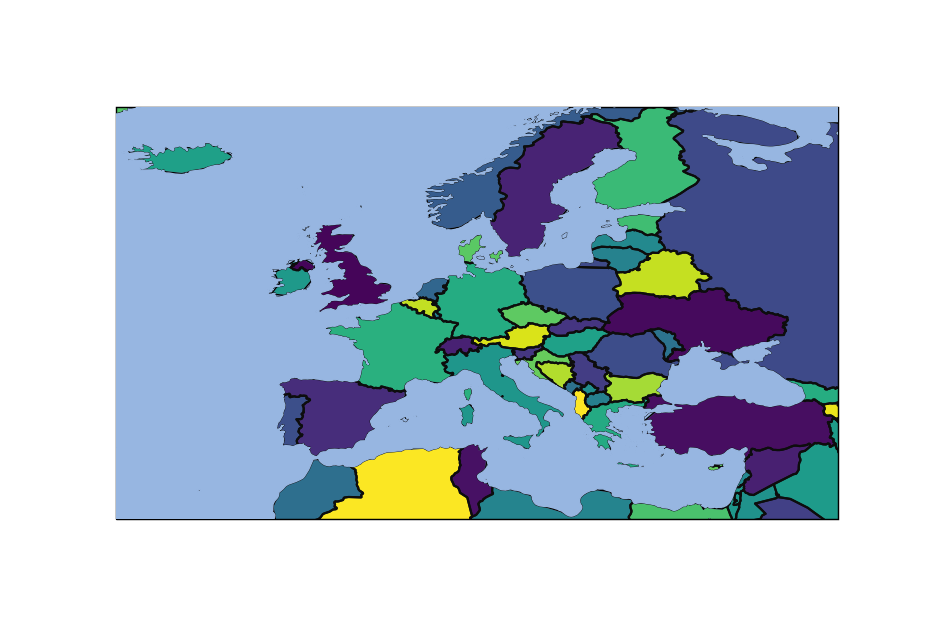

/home/nrieger/anaconda3/envs/work/lib/python3.7/site-packages/regionmask/core/plot.py:100: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(projection=proj)
/home/nrieger/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if __name__ == '__main__':


In [285]:
%matplotlib notebook

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([-25,45,30,70], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN.with_scale('50m'),zorder=3)
eu_countries.plot(add_label=False);
plt.pcolormesh(pm.longitude, pm.latitude, mask_ma, cmap='viridis');
plt.tight_layout()  

<IPython.core.display.Javascript object>


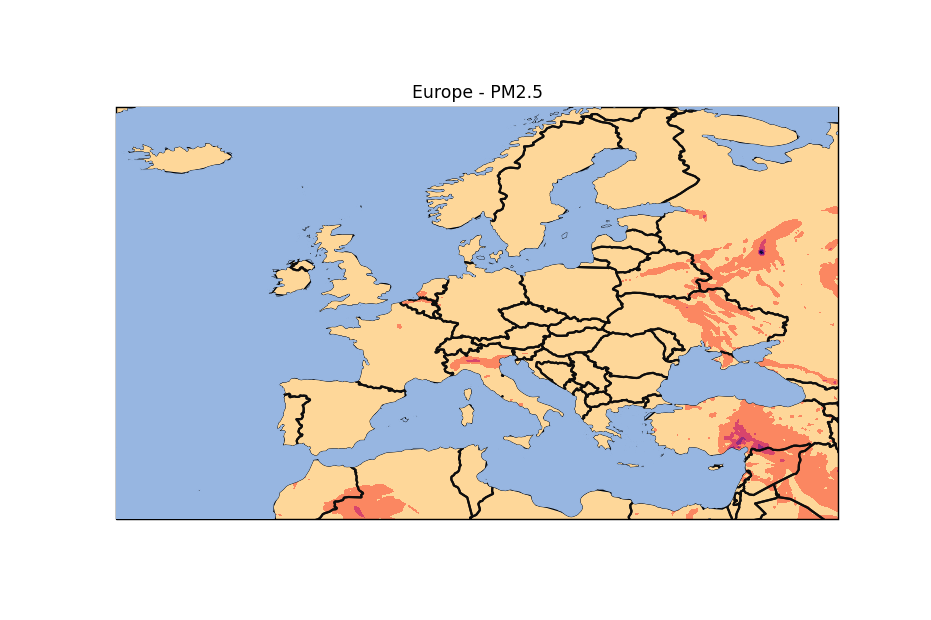

interactive(children=(IntSlider(value=0, description='Time step:', max=11), Output()), _dom_classes=('widget-i…

In [312]:
%matplotlib notebook

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([-25,45,30,70], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN.with_scale('50m'),zorder=3)
ax.coastlines(resolution='50m')
co = ax.contourf(pm.longitude,pm.latitude,pm[0],transform=ccrs.PlateCarree(),cmap='magma_r')
ax.set_title('Europe - PM2.5')
eu_countries.plot(add_label=False,ax=ax);
#ax.add_feature(states_provinces, edgecolor='gray')
#ax.set_aspect('auto')
plt.show()

def update(time=0):
    ax.contourf(pm.longitude,pm.latitude,pm[time],transform=ccrs.PlateCarree(),cmap='magma_r')

interactive(update,time=wtime)



# Risk

In [119]:

pm25 = pm25.sortby('latitude')
f = interpolate.interp2d(pm25.longitude, pm25.latitude, pm25[0].data, kind='cubic')

pm25new = f(dep.lon, dep.lat)
pm25new.size

9216

In [120]:


fig = plt.figure(figsize=(9,2))
ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(133, projection=ccrs.PlateCarree())
ax1.contourf(dep.lon.sort_values(),dep.lat.sort_values(),pm25new, cmap='RdBu_r',shading='gouraud')
ax2.scatter(dep.lon,dep.lat,c=dep.total,s=10, vmin=0, vmax=1000000, cmap='RdBu_r')
for a in [ax1,ax2,ax3]:
    a.coastlines('10m', lw=.5)
    a.set_extent([-5,10,40,52])
plt.tight_layout()
ax3.scatter(dep.lon,dep.lat,c=(10*pm25new).astype(int),s=.4, vmin=0, vmax=6, cmap='RdBu_r')

<IPython.core.display.Javascript object>

/home/nrieger/anaconda3/envs/work/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1400: UserWarning: The following kwargs were not used by contour: 'shading'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/nrieger/anaconda3/envs/work/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # Remove the CWD from sys.path while we load stuff.


ValueError: 'c' argument has 9216 elements, which is inconsistent with 'x' and 'y' with size 96.